## 实验三：参数估计 & 非参数估计

- 姓名：卢麒萱
- 学号：2010519
- 专业：计算机科学与技术

### 实验要求
#### 基本要求
生成两个各包含 N=1200 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $μ1=[1,4] , μ2=[4,1] ,  μ3=[8,4]$和协方差矩阵 $D1=D2=D3=2I$ ，其中 $I$ 是  2∗2 的单位矩阵。在生成数据集合 $X1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X2$ 时，先验概率如下：$p(w1)=0.6,  p(w2)=0.1 ,  p(w3)=0.3$
- 在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。
- 在两个数据集合上分别应用  h=1  时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果。

#### 中级要求
根据初级要求中使用的一个核函数，在数据集  X2 上应用交叉验证法，在  $h∈[0.1,0.5,1,1.5,2]$ 中寻找最优的h值。

#### 高级要求
任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图。

### 实验重点函数说明

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

- `Generate_Sample_Gaussian`

  生成符合正态分布的数据,`P`是指的先验概率,`label`是类标签

In [2]:
# 生成正态分布数据
def Generate_Sample_Gaussian(mean, cov, P, label):
  '''
    mean 为均值向量
    cov 为方差矩阵a
    P 为单个类的先验概率
    return 单个类的数据集
  '''
  temp_num = round(1200 * P)
  x, y = np.random.multivariate_normal(mean, cov, temp_num).T
  z = np.ones(temp_num) * label
  X = np.array([x, y, z])
  return X.T

- `Gaussian_function`

  - 计算多维(这里是2维)样本数据的概率p(x|w)，参数mean是已知的均值向量
  - cov是已知的协方差矩阵，x是样本数据

In [3]:
def Gaussian_function(x, mean, cov):
  det_cov = np.linalg.det(cov)  # 计算方差矩阵的行列式
  inv_cov = np.linalg.inv(cov)  # 计算方差矩阵的逆
  #计算概率p(x|w)
  p = 1/(2*np.pi*np.sqrt(det_cov))*np.exp(-0.5 * 
  np.dot(np.dot((x - mean),inv_cov), (x - mean)))
  return p

- `Gaussian_Kernel`

  高斯核概率密度函数计算

In [4]:
# 在公式中，x和mean应该是列向量，但是为了方便，这里接收的都是行向量（维度：1*2）
def Gaussian_Kernel(x, X, h):
  # 计算概率p(x|w)
  p = (1 / (np.sqrt(2 * np.pi) * h)) * np.array([np.exp(-0.5 * np.dot(x - X[i], x - X[i]) / (h * h)) for i in range(len(X))]).mean()
  return p

- `Generate_DataSet`

  根据先验概率生成数据集

In [5]:
def Generate_DataSet(mean, cov, P):
  # 按照先验概率生成正态分布数据
  # 返回所有类的数据集
  X = []
  label = 1
  for i in range(3):
    # 把此时类i对应的数据集加到已有的数据集中
    X.extend(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
    label += 1
    i = i + 1
  return X

- `Generate_DataSet_plot`

  画出不同先验对应的散点图

In [6]:
def Generate_DataSet_plot(mean, cov, P):
  # 画出不同先验对应的散点图
  xx = []
  label = 1
  for i in range(3):
    xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
    label += 1
    i = i + 1
  # 画图
  plt.figure()
  if P==[1 / 3, 1 / 3, 1 / 3]:
    plt.title("X1分布图")
  else:
    plt.title("X2分布图")
  for i in range(3):
    #画出每类的样本向量(x,y)
    plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=4.)
    #画出每类的中心点(均值向量对应的点)
    plt.plot(mean[i][0], mean[i][1], 'r*')
  plt.show()
  return xx

- `Likelihood_Test_Rule`

  使用似然率测试规则进行估计得准确率

In [7]:
# 似然率测试规则进行估计得准确率
def Likelihood_Test_Rule(X, mean, cov, P):
  class_num = mean.shape[0]  # 类的个数
  num = np.array(X).shape[0]
  error_rate = 0
  for i in range(num):
    p_temp = np.zeros(3)
    for j in range(class_num):
    	# 计算样本i决策到j类的概率
      p_temp[j] = Gaussian_function(X[i][0:2], mean[j], cov)  
    p_class = np.argmax(p_temp) + 1  # 得到样本i决策到的类
    if p_class != X[i][2]:
      error_rate += 1
  return round(error_rate / num , 3)

In [8]:
# 似然率测试规则进行估计得准确率
def Likelihood_Test_Rule_Kernel(X, mean, cov, P, h):
  class_num = mean.shape[0]  # 类的个数
  num = np.array(X).shape[0]
  error_rate = 0
  for i in range(num):
    p_temp = np.zeros(3)
    for j in range(class_num):
    	# 计算样本i决策到j类的概率
      p_temp[j] = Gaussian_Kernel(X[i][0:2], mean[j], h)  
    p_class = np.argmax(p_temp) + 1  # 得到样本i决策到的类
    if p_class != X[i][2]:
      error_rate += 1
  return round(error_rate / num , 3)

这个函数分别计算数据集中的每个样本被决策到三个不同的类的概率`p_temp`,使用`np.argmax()`求出列表中值最大的元素的下标`index`，`index+1`即为我们决策出的结果`p_class`，用`p_class`和样本真正的类别`X[i][2]`比较，判断正确与否，计算准确率。

- `Max_Posterior_Rule`

  使用最大后验概率规则进行估计得准确率

In [9]:
#最大后验概率规则进行估计得准确率
def Max_Posterior_Rule(X, mean, cov, P):
  class_num = mean.shape[0]  # 类的个数
  num = np.array(X).shape[0]
  error_rate = 0
  for i in range(num):
    p_temp = np.zeros(3)
    for j in range(class_num):
    	# 计算样本i是j类的后验概率
      p_temp[j] =Gaussian_function(X[i][0:2],mean[j],cov)*P[j]
    p_class = np.argmax(p_temp) + 1  # 得到样本i分到的类
    if p_class != X[i][2]:
      error_rate += 1
  return round(error_rate / num,3)

基本思路和似然率测试规则是一样的，但这里计算概率的函数是`P(x|w)*P[i]`

- `repeated_trials`

  单次实验求不同准则下的分类误差

In [10]:
# 单次试验求不同准则下的分类误差
def repeated_trials(mean, cov, P1, P2):
  # 根据mean，cov，P1,P2生成数据集X1,X2
  # 通过不同规则得到不同分类错误率并返回
  # 生成N=1200的数据集
  X1 = Generate_DataSet(mean, cov, P1)
  X2 = Generate_DataSet(mean, cov, P2)
  error = np.zeros((2, 2))
  # 计算似然率测试规则误差
  error_likelihood = Likelihood_Test_Rule(X1, mean, cov, P1)
  error_likelihood_2 = Likelihood_Test_Rule(X2, mean, cov, P2)
  error[0] = [error_likelihood, error_likelihood_2]
  # 计算最大后验概率规则误差
  error_Max_Posterior_Rule = Max_Posterior_Rule(X1, mean, cov, P1)
  error_Max_Posterior_Rule_2 = Max_Posterior_Rule(X2, mean, cov, P2)
  error[1] = [error_Max_Posterior_Rule, error_Max_Posterior_Rule_2]
  return error

分别生成两组数据集，分别对这两个数据集进行不同规则下的分类误差分析，将结果存在`error`中并返回

#### 根据题目设置参数

In [11]:
mean = np.array([[1, 4], [4, 1], [8, 4]])  # 均值数组
cov = [[2, 0], [0, 2]]  # 协方差矩阵
num = 1200  # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]  # 样本X1的先验概率
P2 = [0.6, 0.3, 0.1]  # 样本X2的先验概率

#### 绘制散点图，观察样本分布

/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


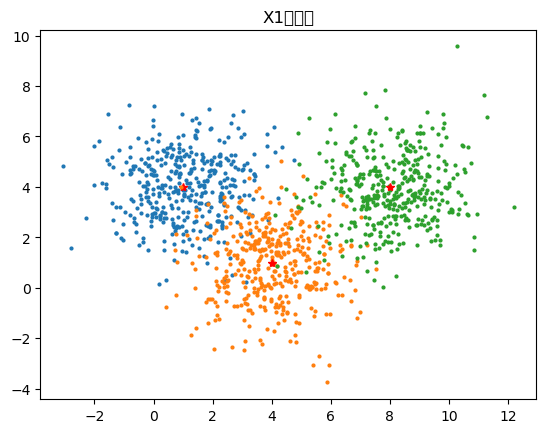

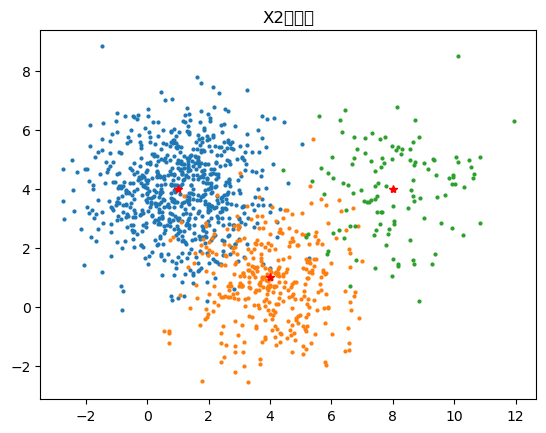

[array([[-0.76940816,  0.53552302,  1.        ],
        [ 0.82429736,  3.14234727,  1.        ],
        [ 0.16118345,  4.38222703,  1.        ],
        ...,
        [ 2.02513385,  3.501692  ,  1.        ],
        [ 1.64686503,  4.34154681,  1.        ],
        [ 1.5214594 ,  2.78876745,  1.        ]]),
 array([[ 2.39541039, -1.87384455,  2.        ],
        [ 2.67551086,  2.09621258,  2.        ],
        [ 3.42131381,  1.19146279,  2.        ],
        ...,
        [ 3.64631341,  0.77325006,  2.        ],
        [ 4.28233792,  1.35070319,  2.        ],
        [ 3.91596754,  0.44201717,  2.        ]]),
 array([[ 9.57532955,  2.84823147,  3.        ],
        [ 7.78281615,  2.09398541,  3.        ],
        [ 7.61862852,  4.72720725,  3.        ],
        [ 7.38909384,  2.43470134,  3.        ],
        [ 8.83796248,  5.76639841,  3.        ],
        [ 6.79240476,  1.58888147,  3.        ],
        [ 8.5014082 ,  3.34547843,  3.        ],
        [ 7.86173254,  2.6527052 ,  3. 

In [12]:
Generate_DataSet_plot(mean, cov, P1)  # 画X1数据集散点图
Generate_DataSet_plot(mean, cov, P2)  # 画X2数据散点图

#### 进行十次试验观察试验结果

In [13]:
# 计算十次运算的总误差
error_all = np.zeros((2, 2))
# 测试times_num次求平均
times_num = 10
for times in range(times_num):
  error=repeated_trials(mean,cov,P1,P2)
  print("第{}次试验: 极似然规则 最大后验规则".format(times+1))
  print("X1误差:   \t{}  \t{}".format(error[0][0],error[1][0]))
  print("X2误差:   \t{}  \t{}".format(error[0][1], error[1][1]))
  error_all += error
# 计算平均误差
error_ave = np.around(error_all / times_num,4)
print("平均误差:  极似然规则   最大后验规则")
print("X1误差:  \t{}   \t{}".format(error_ave[0][0],error_ave[1][0]))
print("X2误差:  \t{}   \t{}".format(error_ave[0][1],error_ave[1][1]))

第1次试验: 极似然规则 最大后验规则
X1误差:   	0.083  	0.083
X2误差:   	0.075  	0.071
第2次试验: 极似然规则 最大后验规则
X1误差:   	0.068  	0.068
X2误差:   	0.084  	0.078
第3次试验: 极似然规则 最大后验规则
X1误差:   	0.068  	0.068
X2误差:   	0.058  	0.058
第4次试验: 极似然规则 最大后验规则
X1误差:   	0.073  	0.073
X2误差:   	0.071  	0.072
第5次试验: 极似然规则 最大后验规则
X1误差:   	0.068  	0.068
X2误差:   	0.077  	0.073
第6次试验: 极似然规则 最大后验规则
X1误差:   	0.07  	0.07
X2误差:   	0.079  	0.062
第7次试验: 极似然规则 最大后验规则
X1误差:   	0.069  	0.069
X2误差:   	0.068  	0.054
第8次试验: 极似然规则 最大后验规则
X1误差:   	0.062  	0.062
X2误差:   	0.073  	0.065
第9次试验: 极似然规则 最大后验规则
X1误差:   	0.061  	0.061
X2误差:   	0.084  	0.069
第10次试验: 极似然规则 最大后验规则
X1误差:   	0.072  	0.072
X2误差:   	0.066  	0.062
平均误差:  极似然规则   最大后验规则
X1误差:  	0.0694   	0.0694
X2误差:  	0.0735   	0.0664


#### 分析试验结果
- 当每个类的先验概率P相同或差别不大时，及似然率测试规则和最大后验概率规则分类结果相差不大
- 当先验概率相差较大时，及似然率规则更好一些

#### 应用高斯核函数估计方法

In [14]:
# 单次试验求不同准则下的分类误差
def repeated_trials_Kernel(mean, cov, P1, P2, h):
  # 根据mean，cov，P1,P2生成数据集X1,X2
  # 通过不同规则得到不同分类错误率并返回
  # 生成N=1200的数据集
  X1 = Generate_DataSet(mean, cov, P1)
  X2 = Generate_DataSet(mean, cov, P2)
  error = np.zeros((2, 2))
  # 计算似然率测试规则误差
  error_likelihood = Likelihood_Test_Rule_Kernel(X1, mean, cov, P1, h)
  error_likelihood_2 = Likelihood_Test_Rule_Kernel(X2, mean, cov, P2, h)
  error[0] = [error_likelihood, error_likelihood_2]
  return error

In [15]:
# 计算十次运算的总误差
error_all = np.zeros((2, 2))
# 测试times_num次求平均
times_num = 10
for times in range(times_num):
  error=repeated_trials_Kernel(mean,cov,P1,P2, 1)
  print("第{}次试验: 极似然规则".format(times+1))
  print("X1误差:   \t{}".format(error[0][0]))
  print("X2误差:   \t{}".format(error[0][1]))
  error_all += error
# 计算平均误差
error_ave = np.around(error_all / times_num,4)
print("平均误差:  极似然规则")
print("X1误差:  \t{}".format(error_ave[0][0]))
print("X2误差:  \t{}".format(error_ave[0][1]))

第1次试验: 极似然规则
X1误差:   	0.353
X2误差:   	0.318
第2次试验: 极似然规则
X1误差:   	0.362
X2误差:   	0.322
第3次试验: 极似然规则
X1误差:   	0.361
X2误差:   	0.321
第4次试验: 极似然规则
X1误差:   	0.366
X2误差:   	0.32
第5次试验: 极似然规则
X1误差:   	0.373
X2误差:   	0.323
第6次试验: 极似然规则
X1误差:   	0.373
X2误差:   	0.323
第7次试验: 极似然规则
X1误差:   	0.358
X2误差:   	0.324
第8次试验: 极似然规则
X1误差:   	0.362
X2误差:   	0.322
第9次试验: 极似然规则
X1误差:   	0.367
X2误差:   	0.315
第10次试验: 极似然规则
X1误差:   	0.358
X2误差:   	0.312
平均误差:  极似然规则
X1误差:  	0.3633
X2误差:  	0.32


### 求最优h值

In [16]:
H = [0.1,0.5,1,1.5,2]
for ht in H:
  # 计算十次运算的总误差
  error_all = np.zeros((2, 2))
  # 测试times_num次求平均
  times_num = 10
  for times in range(times_num):
    error=repeated_trials_Kernel(mean,cov,P1,P2,ht)
    #print("第{}次试验: 极似然规则".format(times+1))
    #print("h = \t{} 误差:   \t{}".format(ht, error[0][1]))
    error_all += error
  # 计算平均误差
  error_ave = np.around(error_all / times_num,4)
  print("平均误差:  极似然规则")
  print("h = \t{} 平均误差:  \t{}".format(ht, error_ave[0][1]))

平均误差:  极似然规则
h = 	0.1 平均误差:  	0.3687
平均误差:  极似然规则
h = 	0.5 平均误差:  	0.3166
平均误差:  极似然规则
h = 	1 平均误差:  	0.3207
平均误差:  极似然规则
h = 	1.5 平均误差:  	0.3205
平均误差:  极似然规则
h = 	2 平均误差:  	0.3224


可见h=0.5时平均误差最小，在该范围内为最优h值。

#### k近邻概率密度估计

In [17]:
def Kneibor_Eval(X, k):
  num = len(X)
  Xtrain = np.array(X)
  # 生成200*200=40000个采样点，每个采样点对应三类的不同概率
  p = np.zeros((200, 200, 3))
  # 在[-5,15]的范围内，以0.1为步长估计概率密度
  for i in np.arange(0, 200):
    for j in np.arange(0, 200):
      '''
      # 生成标准差距离
      # 根据第k个数据点的位置计算V
      # 找到前k个数据点的类别,分别加到对应类的权重上
      # 计算每个采样点的概率密度函数
      
      '''
      x = -5 + i * 0.1
      y = -5 + j * 0.1
      ls = list(map(lambda pt: ((pt[0] - x) ** 2 + (pt[1] - y) ** 2, pt[2]), Xtrain))
      ls.sort()
      for idx in range(k):
        p[i][j][int(ls[idx][1]) - 1] += 1
      p[i][j] /= k
  return p

In [18]:
X1 = Generate_DataSet(mean, cov, P1)
# print(X1)
p = Kneibor_Eval(X1, 20)  # 获得概率密度估计

# 高级要求1
X,Y = np.mgrid[-5:15:200j, -5:15:200j]

Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]


[array([0.73283343, 6.01267935, 1.        ]), array([-0.37079577,  5.46825903,  1.        ]), array([2.66073812, 1.75703164, 1.        ]), array([-2.03202716,  2.2199917 ,  1.        ]), array([-0.45791348,  3.14076165,  1.        ]), array([-0.53192085,  4.7323739 ,  1.        ]), array([-0.13511443,  4.72968418,  1.        ]), array([0.8308678 , 0.44995787, 1.        ]), array([0.94190827, 5.24151373, 1.        ]), array([-0.49233818,  5.87468232,  1.        ]), array([2.6721671 , 3.59795336, 1.        ]), array([0.30562014, 3.17275273, 1.        ]), array([1.94579567, 4.7205435 , 1.        ]), array([2.43982176, 3.60357876, 1.        ]), array([1.16411214, 2.30064385, 1.        ]), array([2.11987232, 4.51989403, 1.        ]), array([3.08687756, 3.26582226, 1.        ]), array([-2.96316809,  2.49639624,  1.        ]), array([-0.30794216,  5.62288458,  1.        ]), array([0.3037944 , 5.87347804, 1.        ]), array([1.92369505, 3.84210866, 1.        ]), array([2.36771081, 5.8765534 ,

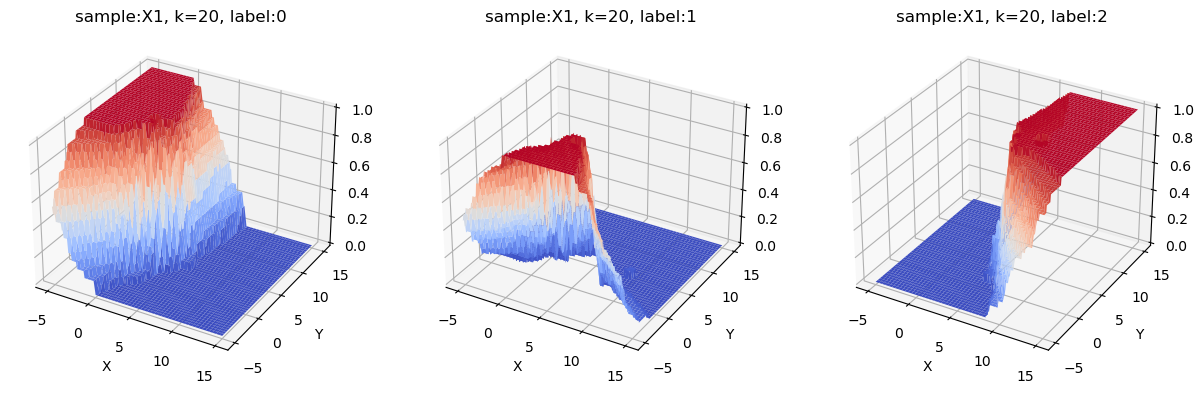

In [19]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=20, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=20, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=20, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()